In [1]:
import pandas as pd

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt
# for basemaps
import contextily as ctx

import folium
from folium.plugins import MarkerCluster
import pandas as pd

import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
stationarea=gpd.read_file("stationarea.geojson")
ethindex=gpd.read_file("ethnicityindex.geojson")
index=gpd.read_file("iqv_average.csv")
tod=stationarea[stationarea['TOD']=='Yes']
ntod=stationarea[stationarea['TOD']=='No']

NameError: name 'gpd' is not defined

In [3]:
ethnover=ethindex[['GEOID_left',
 'NAME_left','iqv_2019_sq',
 'iqv_2013_sq',
 'geometry']]
ethnover.head()

,GEOID_left,NAME_left,iqv_2019_sq,iqv_2013_sq,geometry
0,060014001001,"Block Group 1, Alameda, CA",0.487542,0.611353,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,060014002001,"Block Group 1, Alameda, CA",0.448085,0.611353,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
2,060014002002,"Block Group 2, Alameda, CA",0.549006,0.611353,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
3,060014003001,"Block Group 1, Alameda, CA",0.588805,0.611353,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
4,060014042001,"Block Group 1, Alameda, CA",0.520958,0.611353,"MULTIPOLYGON (((-122.23661 37.84110, -122.2364..."


In [4]:
def averageoverlap(lc, x, df1=stationarea, df2=ethnover):
    st=df1.loc[[lc]]
    st_ol=gpd.sjoin(st,df2, how='inner')
    st_av=st_ol.mean(axis=0, numeric_only=True)
    st_av=st_av.to_frame().rename(columns={0:'Value 2011'})
    st_av=st_av.transpose()
    st_av['Station']=x
    return (st_av)

In [8]:
df=['ASHBY',
'MACARTHUR',
'HAYWARD',
'SOUTH',
'FRUITVALE',
'BERKELEY',
'OAKLAND',
'BAYFAIR',
'UNIONCITY',
'LAKEMERRITT',]

In [9]:
df

['ASHBY',
 'MACARTHUR',
 'HAYWARD',
 'SOUTH',
 'FRUITVALE',
 'BERKELEY',
 'OAKLAND',
 'BAYFAIR',
 'UNIONCITY',
 'LAKEMERRITT']

In [ ]:
for i in df:
    split

In [5]:
ASHBY=averageoverlap(0,'ASHBY')
MACARTHUR=averageoverlap(1,'MACARTHUR')
HAYWARD=averageoverlap(2,'HAYWARD')
SOUTH=averageoverlap(3,'SOUTH HAYWARD')
FRUITVALE=averageoverlap(4,'FRUITVALE')
BERKELEY=averageoverlap(5,'NORTH BERKELEY')
OAKLAND=averageoverlap(6,'19TH STREET/OAKLAND')
BAYFAIR=averageoverlap(7,'BAY FAIR')
UNIONCITY=averageoverlap(8,'UNION CITY')
LAKEMERRITT=averageoverlap(9,'LAKE MERRITT')

In [6]:
lakeall=ASHBY
lakeall=lakeall.append(MACARTHUR, ignore_index = True)
lakeall=lakeall.append(HAYWARD, ignore_index = True)
lakeall=lakeall.append(SOUTH, ignore_index = True)
lakeall=lakeall.append(FRUITVALE, ignore_index = True)
lakeall=lakeall.append(BERKELEY, ignore_index = True)
lakeall=lakeall.append(OAKLAND, ignore_index = True)
lakeall=lakeall.append(BAYFAIR, ignore_index = True)
lakeall=lakeall.append(UNIONCITY, ignore_index = True)
lakeall=lakeall.append(LAKEMERRITT, ignore_index = True)



In [7]:
lakeall

,index_right,iqv_2019_sq,iqv_2013_sq,Station
0,961.000000,0.807620,0.779275,ASHBY
1,520.096774,0.798501,0.764635,MACARTHUR
2,4988.000000,0.801418,0.673415,HAYWARD
3,5375.888889,0.753841,0.720262,SOUTH HAYWARD
4,2513.545455,0.611173,0.633157,FRUITVALE
5,3115.260870,0.804234,0.705502,NORTH BERKELEY
6,928.600000,0.757193,0.657919,19TH STREET/OAKLAND
7,4494.076923,0.596338,0.806828,BAY FAIR
8,5691.962963,0.708905,0.699273,UNION CITY
9,1474.740000,0.695569,0.680033,LAKE MERRITT


In [8]:
buffer_plot=stationarea
buffer_plot['Index 2019']=lakeall['iqv_2019_sq']
buffer_plot['Index 2013']=lakeall['iqv_2013_sq']
buffer_plot

,Station,City,Code,TOD,County,Marker,buffer_polygon,geometry,Index 2019,Index 2013
0,ASHBY,Berkeley,BKY,Yes,ALA,D,"POLYGON ((563770.9742351742 4188779.586837385,...","POLYGON ((-122.27519 37.84423, -122.27886 37.8...",0.807620,0.779275
1,MACARTHUR,Oakland,OAK,Yes,ALA,D,"POLYGON ((563693.8852295046 4186061.965723997,...","POLYGON ((-122.27631 37.81974, -122.27785 37.8...",0.798501,0.764635
2,HAYWARD,Hayward,HAY,Yes,ALA,D,"POLYGON ((580092.9554610827 4168606.360613972,...","POLYGON ((-122.09192 37.66114, -122.09221 37.6...",0.801418,0.673415
3,SOUTH HAYWARD,Hayward,HAY,Yes,ALA,D,"POLYGON ((582418.4676641112 4164677.51896479, ...","POLYGON ((-122.06600 37.62552, -122.06785 37.6...",0.753841,0.720262
4,FRUITVALE,Oakland,OAK,Yes,ALA,D,"POLYGON ((567336.267085615 4180096.87365391, 5...","POLYGON ((-122.23548 37.76572, -122.23554 37.7...",0.611173,0.633157
5,NORTH BERKELEY,Berkeley,BKY,No,ALA,o,"POLYGON ((562158.4961938841 4191096.300319521,...","POLYGON ((-122.29332 37.86522, -122.29466 37.8...",0.804234,0.705502
6,19TH STREET/OAKLAND,Oakland,OAK,No,ALA,o,"POLYGON ((563608.8389169731 4183769.339677225,...","POLYGON ((-122.27748 37.79909, -122.27882 37.7...",0.757193,0.657919
7,BAY FAIR,San Leandro,SAN,No,ALA,o,"POLYGON ((576458.9770771035 4171618.447772438,...","POLYGON ((-122.13281 37.68859, -122.13353 37.6...",0.596338,0.806828
8,UNION CITY,Union City,UNC,No,ALA,o,"POLYGON ((586339.0999929304 4159876.292845242,...","POLYGON ((-122.02215 37.58189, -122.02477 37.5...",0.708905,0.699273
9,LAKE MERRITT,Oakland,OAK,No,ALA,o,"POLYGON ((563781.1147714683 4182741.967714277,...","POLYGON ((-122.27561 37.78981, -122.27509 37.7...",0.695569,0.680033


<AxesSubplot:>

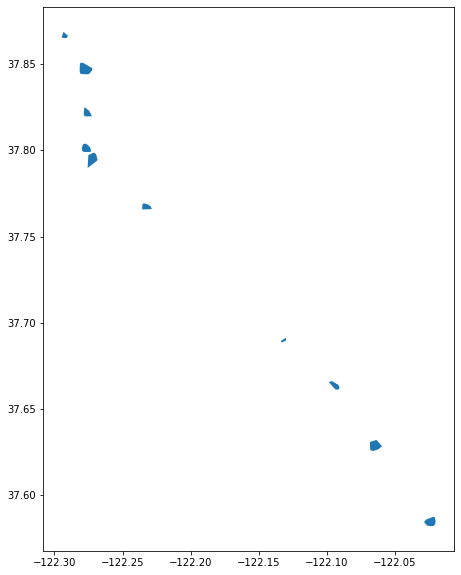

In [10]:
buffer_plot.plot(figsize=(10,10))

In [11]:
buffer_plot.to_file("buffer_plot.geojson", driver='GeoJSON')

In [9]:
buffer_plot=buffer_plot.to_crs(epsg=3857)
ethindex_wm=ethindex.to_crs(epsg=3857)

minx, miny, maxx, maxy = buffer_plot.geometry.total_bounds

In [13]:
ethindex.columns.to_list()

['GEOID_left',
 'NAME_left',
 'Total_2019',
 'Non Hispanic_2019',
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019',
 'Percent Total_2019',
 'Percent Non Hispanic_2019',
 'Percent Non Hispanic White_2019',
 'Percent Non Hispanic Black_2019',
 'Percent Non Hispanic American Indian and Alaska Native_2019',
 'Percent Non Hispanic Asian_2019',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Percent Non Hispanic Some other race_2019',
 'Percent Non Hispanic Two or more races_2019',
 'Percent Hispanic_2019',
 'index_right',
 'GEOID_right',
 'Total_2013',
 'Non Hispanic_2013',
 'Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non 

In [10]:
ethnover2=ethindex[['GEOID_left',
 'NAME_left',
 'Total_2019',
 'Non Hispanic_2019',
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019',
 'Percent Total_2019',
 'Percent Non Hispanic_2019',
 'Percent Non Hispanic White_2019',
 'Percent Non Hispanic Black_2019',
 'Percent Non Hispanic American Indian and Alaska Native_2019',
 'Percent Non Hispanic Asian_2019',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Percent Non Hispanic Some other race_2019',
 'Percent Non Hispanic Two or more races_2019',
 'Percent Hispanic_2019',
 'Total_2013',
 'Non Hispanic_2013',
 'Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Non Hispanic Some other race_2013',
 'Non Hispanic Two or more races_2013',
 'Hispanic_2013',
 'Percent Total_2013',
 'Percent Non Hispanic_2013',
 'Percent Non Hispanic White_2013',
 'Percent Non Hispanic Black_2013',
 'Percent Non Hispanic American Indian and Alaska Native_2013',
 'Percent Non Hispanic Asian_2013',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Percent Non Hispanic Some other race_2013',
 'Percent Non Hispanic Two or more races_2013',
 'Percent Hispanic_2013',
 'Total_change',
 'Non Hispanic_change',
 'Non Hispanic White_change',
 'Non Hispanic Black_change',
 'Non Hispanic American Indian and Alaska Native_change',
 'Non Hispanic Asian_change',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_change',
 'Non Hispanic Some other race_change',
 'Non Hispanic Two or more races_change',
 'Hispanic_change',
 'iqv_2019_sq',
 'iqv_2013_sq',
 'geometry']]

In [11]:
ethnover2.columns=['GEOID',
 'NAME',
 'Total_2019',
 'Non Hispanic_2019',
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019',
 'Percent Total_2019',
 'Percent Non Hispanic_2019',
 'Percent Non Hispanic White_2019',
 'Percent Non Hispanic Black_2019',
 'Percent Non Hispanic American Indian and Alaska Native_2019',
 'Percent Non Hispanic Asian_2019',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Percent Non Hispanic Some other race_2019',
 'Percent Non Hispanic Two or more races_2019',
 'Percent Hispanic_2019',
 'Total_2013',
 'Non Hispanic_2013',
 'Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Non Hispanic Some other race_2013',
 'Non Hispanic Two or more races_2013',
 'Hispanic_2013',
 'Percent Total_2013',
 'Percent Non Hispanic_2013',
 'Percent Non Hispanic White_2013',
 'Percent Non Hispanic Black_2013',
 'Percent Non Hispanic American Indian and Alaska Native_2013',
 'Percent Non Hispanic Asian_2013',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Percent Non Hispanic Some other race_2013',
 'Percent Non Hispanic Two or more races_2013',
 'Percent Hispanic_2013',
 'Total_change',
 'Non Hispanic_change',
 'Non Hispanic White_change',
 'Non Hispanic Black_change',
 'Non Hispanic American Indian and Alaska Native_change',
 'Non Hispanic Asian_change',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_change',
 'Non Hispanic Some other race_change',
 'Non Hispanic Two or more races_change',
 'Hispanic_change',
 'iqv_2019_sq',
 'iqv_2013_sq',
 'geometry']

In [12]:
def indexvalues(lc, x, df1=stationarea, df2=ethnover2):
    st=df1.loc[[lc]]
    st_ol=gpd.sjoin(df2, st, how='inner')
    return(st_ol)

In [13]:
ASHBY2=indexvalues(0,'ASHBY')
MACARTHUR2=indexvalues(1,'MACARTHUR')
HAYWARD2=indexvalues(2,'HAYWARD')
SOUTH2=indexvalues(3,'SOUTH HAYWARD')
FRUITVALE2=indexvalues(4,'FRUITVALE')
BERKELEY2=indexvalues(5,'NORTH BERKELEY')
OAKLAND2=indexvalues(6,'19TH STREET/OAKLAND')
BAYFAIR2=indexvalues(7,'BAY FAIR')
UNIONCITY2=indexvalues(8,'UNION CITY')
LAKEMERRITT2=indexvalues(9,'LAKE MERRITT')

In [15]:
df=df[['GEOID',
 'NAME',
 'Total_2019',
 'Non Hispanic_2019',
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019',
 'Percent Total_2019',
 'Percent Non Hispanic_2019',
 'Percent Non Hispanic White_2019',
 'Percent Non Hispanic Black_2019',
 'Percent Non Hispanic American Indian and Alaska Native_2019',
 'Percent Non Hispanic Asian_2019',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Percent Non Hispanic Some other race_2019',
 'Percent Non Hispanic Two or more races_2019',
 'Percent Hispanic_2019',
 'Total_2013',
 'Non Hispanic_2013',
 'Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Non Hispanic Some other race_2013',
 'Non Hispanic Two or more races_2013',
 'Hispanic_2013',
 'Percent Total_2013',
 'Percent Non Hispanic_2013',
 'Percent Non Hispanic White_2013',
 'Percent Non Hispanic Black_2013',
 'Percent Non Hispanic American Indian and Alaska Native_2013',
 'Percent Non Hispanic Asian_2013',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Percent Non Hispanic Some other race_2013',
 'Percent Non Hispanic Two or more races_2013',
 'Percent Hispanic_2013',
 'Total_change',
 'Non Hispanic_change',
 'Non Hispanic White_change',
 'Non Hispanic Black_change',
 'Non Hispanic American Indian and Alaska Native_change',
 'Non Hispanic Asian_change',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_change',
 'Non Hispanic Some other race_change',
 'Non Hispanic Two or more races_change',
 'Hispanic_change',
 'iqv_2019_sq',
 'iqv_2013_sq',
 'geometry',
 'index_right',
 'Station',
 'City',
 'Code',
 'TOD',
 'County',
 'Marker',
 'buffer_polygon',
 'Index 2019',
 'Index 2013']]

NameError: name 'df' is not defined

In [16]:
def stationbufferdata(station, x):
    averageblock=station.mean(axis=0, numeric_only=True)
    averageblock=averageblock.to_frame().rename(columns={0:x})
    return(averageblock)

In [17]:

ASHBY3=stationbufferdata(ASHBY2,'ASHBY')
MACARTHUR3=stationbufferdata(MACARTHUR2,'MACARTHUR')
HAYWARD3=stationbufferdata(HAYWARD2,'HAYWARD')
SOUTH3=stationbufferdata(SOUTH2,'SOUTH HAYWARD')
FRUITVALE3=stationbufferdata(FRUITVALE2,'FRUITVALE')
BERKELEY3=stationbufferdata(BERKELEY2,'NORTH BERKELEY')
OAKLAND3=stationbufferdata(OAKLAND2,'19TH STREET/OAKLAND')
BAYFAIR3=stationbufferdata(BAYFAIR2,'BAY FAIR')
UNIONCITY3=stationbufferdata(UNIONCITY2,'UNION CITY')
LAKEMERRITT3=stationbufferdata(LAKEMERRITT2,'LAKE MERRITT')



In [18]:
def datatranspose(df):
    df1=df.transpose()
    df1=df1.reset_index()
    return(df1)

In [19]:
ASHBY4=datatranspose(ASHBY3)
MACARTHUR4=datatranspose(MACARTHUR3)
HAYWARD4=datatranspose(HAYWARD3)
SOUTH4=datatranspose(SOUTH3)
FRUITVALE4=datatranspose(FRUITVALE3)
BERKELEY4=datatranspose(BERKELEY3)
OAKLAND4=datatranspose(OAKLAND3)
BAYFAIR4=datatranspose(BAYFAIR3)
UNIONCITY4=datatranspose(UNIONCITY3)
LAKEMERRITT4=datatranspose(LAKEMERRITT3)

In [20]:
stationbuffer=ASHBY4
stationbuffer=stationbuffer.append(MACARTHUR4, ignore_index = True)
stationbuffer=stationbuffer.append(HAYWARD4, ignore_index = True)
stationbuffer=stationbuffer.append(SOUTH4, ignore_index = True)
stationbuffer=stationbuffer.append(FRUITVALE4, ignore_index = True)
stationbuffer=stationbuffer.append(BERKELEY4, ignore_index = True)
stationbuffer=stationbuffer.append(OAKLAND4, ignore_index = True)
stationbuffer=stationbuffer.append(BAYFAIR4, ignore_index = True)
stationbuffer=stationbuffer.append(UNIONCITY4, ignore_index = True)
stationbuffer=stationbuffer.append(LAKEMERRITT4, ignore_index = True)

In [21]:
stationbuffer

,index,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,Non Hispanic Two or more races_2019,...,Non Hispanic Asian_change,Non Hispanic Native Hawaiian and Other Pacific Islander_change,Non Hispanic Some other race_change,Non Hispanic Two or more races_change,Hispanic_change,iqv_2019_sq,iqv_2013_sq,index_right,Index 2019,Index 2013
0,ASHBY,1218.967742,1021.129032,467.935484,312.177419,4.145161,155.161290,0.000000,6.258065,75.451613,...,203.745500,-100.000000,-6.153846,508.718676,54.352075,0.807620,0.779275,0.0,0.807620,0.779275
1,MACARTHUR,1330.935484,1127.741935,386.000000,495.709677,5.419355,119.935484,8.322581,9.677419,102.677419,...,591.252973,-56.944444,66.666667,645.140299,188.744454,0.798501,0.764635,1.0,0.798501,0.764635
2,HAYWARD,2545.000000,1773.000000,381.000000,211.000000,0.000000,1067.000000,10.000000,0.000000,104.000000,...,426.494367,-87.073357,NaN,166.174197,-12.763094,0.801418,0.673415,2.0,0.801418,0.673415
3,SOUTH HAYWARD,2119.388889,1455.111111,234.111111,156.277778,7.333333,896.333333,71.888889,0.000000,89.166667,...,135.108458,141.656367,-100.000000,123.292584,84.733863,0.753841,0.720262,3.0,0.753841,0.720262
4,FRUITVALE,1471.136364,1218.954545,921.000000,23.772727,8.000000,220.272727,3.272727,10.772727,31.863636,...,377.652111,-45.476190,-4.389981,18.270109,348.509527,0.611173,0.633157,4.0,0.611173,0.633157
5,NORTH BERKELEY,1413.913043,1118.000000,586.478261,264.739130,0.000000,168.173913,46.260870,0.000000,52.347826,...,31.128317,83.234127,-100.000000,205.836231,430.485243,0.804234,0.705502,5.0,0.804234,0.705502
6,19TH STREET/OAKLAND,1120.925000,990.900000,256.225000,180.800000,5.050000,500.975000,9.800000,4.550000,33.500000,...,281.442358,-15.619202,-47.222222,69.985892,343.491149,0.757193,0.657919,6.0,0.757193,0.657919
7,BAY FAIR,1220.538462,503.000000,67.076923,183.923077,4.307692,212.000000,0.000000,0.000000,35.692308,...,-47.115901,-100.000000,NaN,-20.648036,119.834956,0.596338,0.806828,7.0,0.596338,0.806828
8,UNION CITY,2266.925926,1994.703704,326.481481,99.370370,4.444444,1277.666667,19.666667,5.333333,261.740741,...,96.398873,-31.982018,-80.104066,801.365365,-8.630578,0.708905,0.699273,8.0,0.708905,0.699273
9,LAKE MERRITT,1797.840000,1647.540000,500.580000,142.680000,13.040000,869.380000,6.280000,2.600000,112.980000,...,950.472571,-4.845959,-4.166667,260.282341,316.586759,0.695569,0.680033,9.0,0.695569,0.680033


In [23]:
type(stationbuffer)

pandas.core.frame.DataFrame

In [35]:
stationbuffer.to_csv(r'stationbuffer.csv')

In [36]:
stationbuffer2=gpd.read_file('stationbuffer_v2.csv')

In [37]:
stationbuffer2

,field_1,index,Year,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,...,field_49,field_50,field_51,field_52,field_53,field_54,field_55,field_56,field_57,geometry
0,0,ASHBY,2019,1218.967742,1021.129032,467.9354839,312.1774194,4.14516129,155.1612903,0,...,,,,,,,,,,None
1,1,MACARTHUR,2019,1330.935484,1127.741935,386,495.7096774,5.419354839,119.9354839,8.322580645,...,,,,,,,,,,None
2,2,HAYWARD,2019,2545,1773,381,211,0,1067,10,...,,,,,,,,,,None
3,3,SOUTH HAYWARD,2019,2119.388889,1455.111111,234.1111111,156.2777778,7.333333333,896.3333333,71.88888889,...,,,,,,,,,,None
4,4,FRUITVALE,2019,1471.136364,1218.954545,921,23.77272727,8,220.2727273,3.272727273,...,,,,,,,,,,None
5,5,NORTH BERKELEY,2019,1413.913043,1118,586.4782609,264.7391304,0,168.173913,46.26086957,...,,,,,,,,,,None
6,6,19TH STREET/OAKLAND,2019,1120.925,990.9,256.225,180.8,5.05,500.975,9.8,...,,,,,,,,,,None
7,7,BAY FAIR,2019,1220.538462,503,67.07692308,183.9230769,4.307692308,212,0,...,,,,,,,,,,None
8,8,UNION CITY,2019,2266.925926,1994.703704,326.4814815,99.37037037,4.444444444,1277.666667,19.66666667,...,,,,,,,,,,None
9,9,LAKE MERRITT,2019,1797.84,1647.54,500.58,142.68,13.04,869.38,6.28,...,,,,,,,,,,None


In [40]:
stationbuffer2.columns.to_list()

['field_1',
 'index',
 'Year',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'Percent Total',
 'Percent Non Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'Percent Hispanic',
 'Index',
 'field_25',
 'field_26',
 'field_27',
 'field_28',
 'field_29',
 'field_30',
 'field_31',
 'field_32',
 'field_33',
 'field_34',
 'field_35',
 'field_36',
 'field_37',
 'field_38',
 'field_39',
 'field_40',
 'field_41',
 'field_42',
 'field_43',
 'field_44',
 'field_45',
 'field_46',
 'field_47',
 'fi

In [41]:
stationbuffer2=stationbuffer2[['index',
 'Year',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'Percent Total',
 'Percent Non Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'Percent Hispanic',
 'Index']]

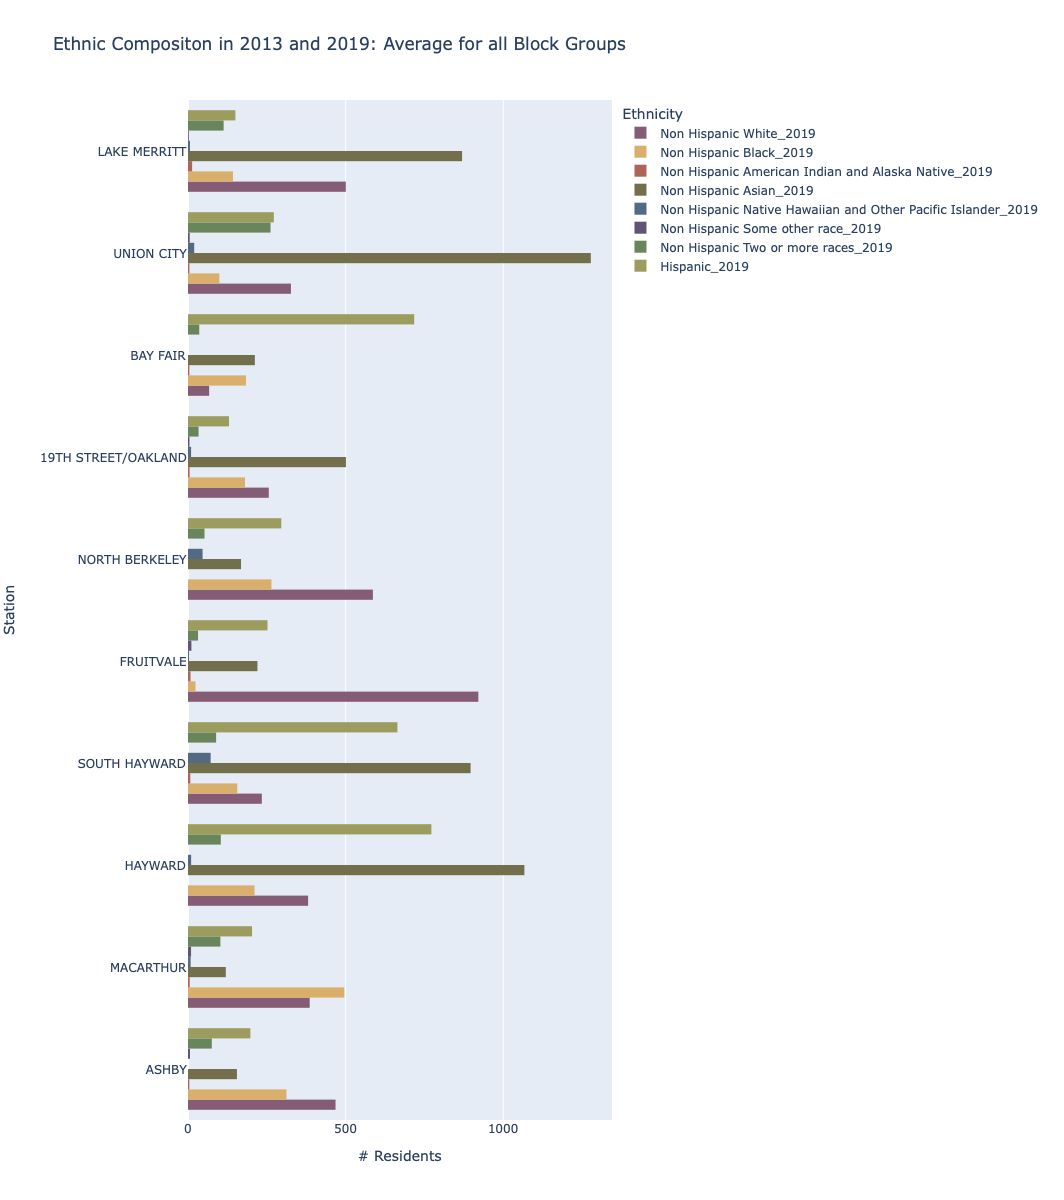

In [84]:
# a simple bar chart, putting date on the x-axis

fig = px.bar( stationbuffer,
             y='index',
             x=['Non Hispanic White_2019',
                'Non Hispanic Black_2019',
                'Non Hispanic American Indian and Alaska Native_2019',
                'Non Hispanic Asian_2019',
                'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
                'Non Hispanic Some other race_2019',
                'Non Hispanic Two or more races_2019',
                'Hispanic_2019'],
             barmode='group',
            orientation='h',
             height=1200,
             #color='index',
             title="Ethnic Compositon in 2013 and 2019: Average for all Block Groups",
             #color_discrete_sequence=["#e9967a","#a52a2a"],
             color_discrete_sequence=px.colors.qualitative.Antique,
             labels={'index':'Station','value':'# Residents', 'variable':'Ethnicity',
                     'Non Hispanic White_2019':'White',
                'Non Hispanic Black_2019':'Black',
                'Non Hispanic American Indian and Alaska Native_2019':'AI/AN',
                'Non Hispanic Asian_2019':'Asian',
                'Non Hispanic Native Hawaiian and Other Pacific Islander_2019':'NH/PI',
                'Non Hispanic Some other race_2019':'Other races',
                'Non Hispanic Two or more races_2019':'Two or more race',
                'Hispanic_2019':'Hispanic'})

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

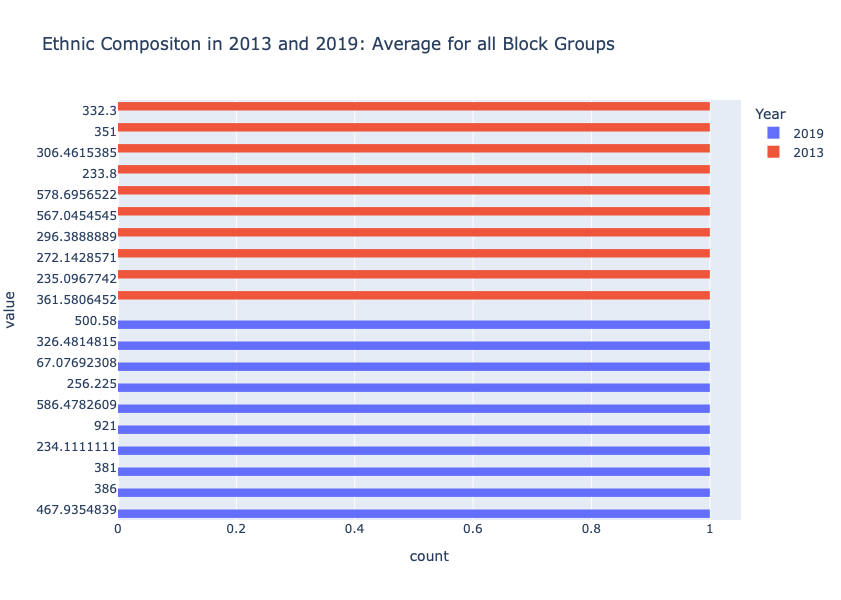

In [77]:
# a simple bar chart, putting date on the x-axis

fig = px.bar(stationbuffer2,
             y='index',
             x=['Non Hispanic White'],
             barmode='group',
             height=600,
             color='Year',
             title="Ethnic Compositon in 2013 and 2019: Average for all Block Groups",
             #color_discrete_sequence=["#e9967a","#a52a2a"],
             #labels={'Ethnicity':'Ethnicity','value':'# Residents', 'variable':'Year'}
                     )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()



tod.plot(ax=ax,
         color = 'black',
         marker = "D",
         markersize = 15,
        label = tod.Station)

brt.plot(ax=ax,
         color = 'yellow',
         marker = "x",
         markersize = 25,
        label = brt.Station)

fig, ax = plt.subplots(figsize=(12,12))

# block groups
ethindex_wm.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)
buffer_plot.plot(ax=ax,
           column = 'Index 2019',
         cmap='coolwarm', 
         edgecolor='white',
         alpha=0.8,
           scheme='naturalbreaks',
            linewidth=0.3,
            legend=True)

ax.set_xlim(minx - 2000, maxx + 2000) 
ax.set_ylim(miny - 2000, maxy + 2000)
ax.axis('off')
ax.set_title('Change in Block Groups who spend >30% of their income on rent',fontsize=15,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

maps = folium.Map(location = [37.8,-121.870118961256], tiles = "CartoDB positron", zoom_start = 11)

folium.Choropleth(
    geo_data=buffer_plot,
    name="choropleth",
    data=buffer_plot,
    columns=["Station", "Index 2019"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(maps)


folium.LayerControl().add_to(m)

m
for _, r in buffer_plot.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    geo_j = folium.GeoJson(data=buffer_plot,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Station']).add_to(geo_j)
    geo_j.add_to(maps)
maps

fig = px.choropleth_mapbox(buffer_plot, geojson=buffer_plot, locations='geometry', color='Station',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.666429, "lon": -122.057218},
                           opacity=0.5,
                           #labels={'Station':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()